Idea
* create Prot vs color plot for known young open clusters
* see script in /scripts

In [1]:
%matplotlib inline
from tqdm import tqdm
import numpy as np
import chronos as cr
from tqdm import tqdm

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
c = cr.Cluster(cluster_name='IC_2602', catalog_name='CantatGaudin2018')
#cluster members
cm = c.query_cluster_members()
cm.shape

(311, 15)

100%|██████████| 1/1 [03:09<00:00, 189.11s/it]


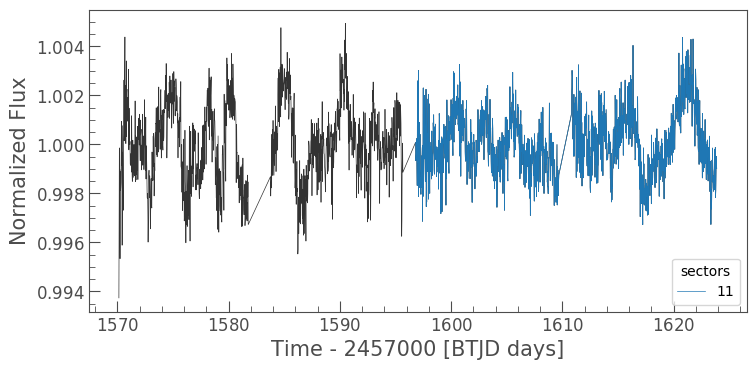

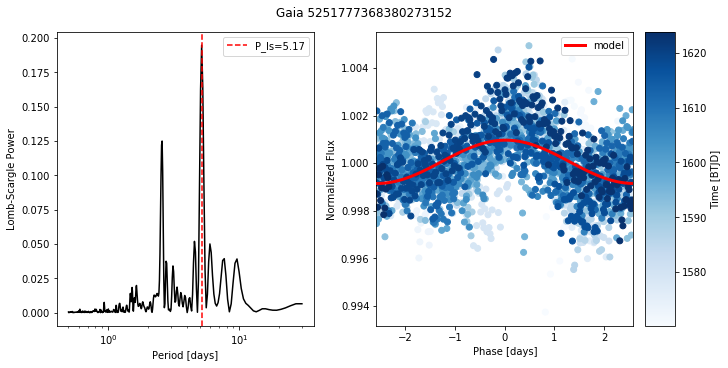

In [3]:
for i in tqdm(range(5)[:1]):
#     gaiaid = np.random.choice(cm.source_id)
    gaiaid = 5251777368380273152
    t = cr.Target(gaiaDR2id=gaiaid)
    sectors = t.get_all_sectors()
    lcs = []
    if len(sectors)>1:
        #query the first available sector
        lc0 = t.make_custom_ffi_lc(sector=sectors[0]).normalize()
        for sector in tqdm(sectors[1:]):
            lc = t.make_custom_ffi_lc(sector=sector).normalize()
            #stitch other sectors
            lc0 = lc0.append(lc)
            lcs.append(lc)
        ax = lc0.plot(label='_nolegend_') #','.join([str(s) for s in sectors])
        #overlay plot each sector with different color
        for n,lc in enumerate(lcs):
            lc.plot(ax=ax, color=f'C{n}', label=sector)
            ax.legend(title='sectors')
            
        #plot lomb scargle periodogram
        time, flux = lc0.time, lc0.flux
        fig = cr.plot_lomb_scargle(time, flux, min_per=0.5, max_per=30, title=f'Gaia {gaiaid}')

After estimating Prot, color should also be querried from TIC catalog.

In [4]:
tic = t.query_tic_catalog(return_nearest_xmatch=True)

Querying TIC catalog for 158.687 -64.4261
            within 3.0 arcsec.



In [7]:
tic.index.tolist()

['ID',
 'ra',
 'dec',
 'pmRA',
 'pmDEC',
 'Tmag',
 'objType',
 'typeSrc',
 'version',
 'HIP',
 'TYC',
 'UCAC',
 'TWOMASS',
 'SDSS',
 'ALLWISE',
 'GAIA',
 'APASS',
 'KIC',
 'POSflag',
 'e_pmRA',
 'e_pmDEC',
 'PMflag',
 'plx',
 'e_plx',
 'PARflag',
 'gallong',
 'gallat',
 'eclong',
 'eclat',
 'Bmag',
 'e_Bmag',
 'Vmag',
 'e_Vmag',
 'umag',
 'e_umag',
 'gmag',
 'e_gmag',
 'rmag',
 'e_rmag',
 'imag',
 'e_imag',
 'zmag',
 'e_zmag',
 'Jmag',
 'e_Jmag',
 'Hmag',
 'e_Hmag',
 'Kmag',
 'e_Kmag',
 'TWOMflag',
 'prox',
 'w1mag',
 'e_w1mag',
 'w2mag',
 'e_w2mag',
 'w3mag',
 'e_w3mag',
 'w4mag',
 'e_w4mag',
 'GAIAmag',
 'e_GAIAmag',
 'e_Tmag',
 'TESSflag',
 'SPFlag',
 'Teff',
 'e_Teff',
 'logg',
 'e_logg',
 'MH',
 'e_MH',
 'rad',
 'e_rad',
 'mass',
 'e_mass',
 'rho',
 'e_rho',
 'lumclass',
 'lum',
 'e_lum',
 'd',
 'e_d',
 'ebv',
 'e_ebv',
 'numcont',
 'contratio',
 'disposition',
 'duplicate_id',
 'priority',
 'eneg_EBV',
 'epos_EBV',
 'EBVflag',
 'eneg_Mass',
 'epos_Mass',
 'eneg_Rad',
 'epos_Rad',